In [1]:
from __future__ import print_function

import time

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Read in the data to fit

X = pd.read_csv("RNAExpression_6_cancer_types_TCGA.csv")


# Look at the shape of the data to construct the input layer.
print("We have {} instances of data with {} variables".format(*X.shape))

We have 3740 instances of data with 60485 variables


In [3]:
print("We have {} instances of data with {} variables".format(*X.shape))

# dataframe.size
size = X.size

# dataframe.shape
shape = X.shape

# dataframe.ndim
df_ndim = X.ndim

We have 3740 instances of data with 60485 variables


In [4]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(X.shape[0])

In [5]:
y = np.array(X.pop("label"))
# remove the features labels
column_numbers = [x for x in range(X.shape[1])]  # list of columns' integer indices

column_numbers.remove(0)  # removing column integer index 0
X = X.iloc[:, column_numbers]  # return all columns except the 0th column

In [6]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
X["pca-one"] = pca_result[:, 0]
X["pca-two"] = pca_result[:, 1]
X["pca-three"] = pca_result[:, 2]
print(
    "Explained variation per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variation per principal component: [0.36571068 0.10732439 0.08135098]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

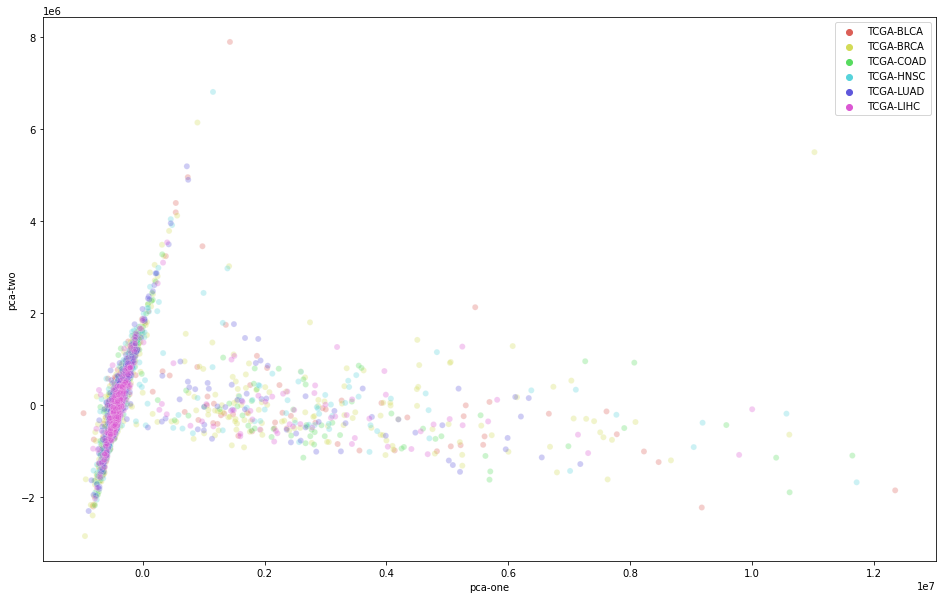

In [7]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="pca-one",
    y="pca-two",
    hue=y,
    palette=sns.color_palette("hls", 6),
    data=X.loc[rndperm, :],
    legend="full",
    alpha=0.3,
)

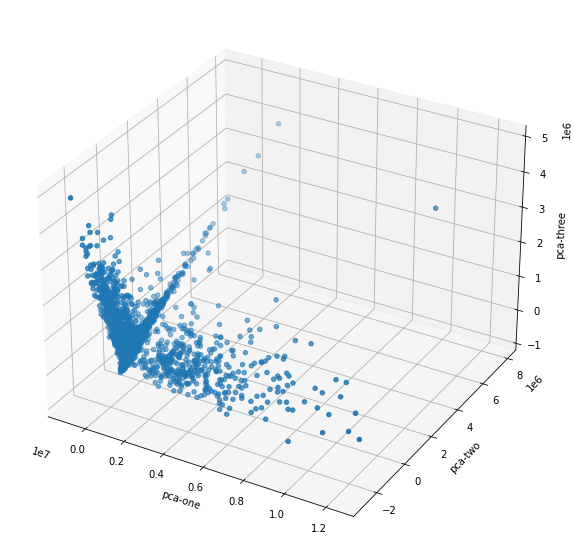

In [8]:
ax = plt.figure(figsize=(16, 10)).gca(projection="3d")
ax.scatter(
    xs=X.loc[rndperm, :]["pca-one"],
    ys=X.loc[rndperm, :]["pca-two"],
    zs=X.loc[rndperm, :]["pca-three"],
    cmap="tab6",
)
ax.set_xlabel("pca-one")
ax.set_ylabel("pca-two")
ax.set_zlabel("pca-three")
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


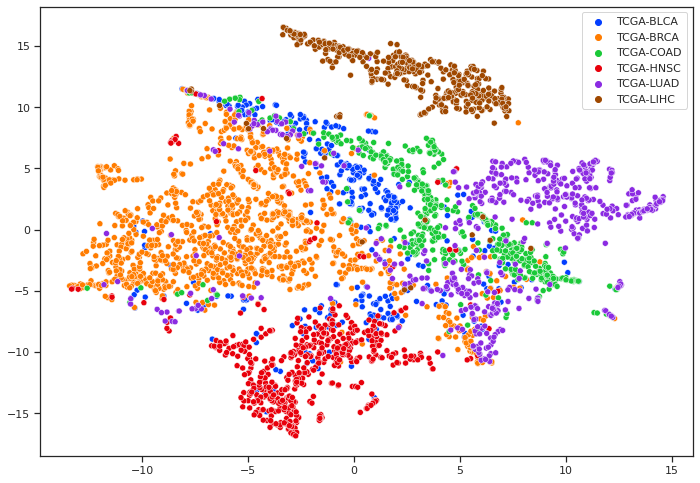

In [13]:
#time_start = time.time()
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
#tsne_results = tsne.fit_transform(X)
#print("t-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

sns.set_context("paper")
sns.set(rc={"figure.figsize": (11.7, 8.27)})
palette = sns.color_palette("bright", 6)
sns.set_style("ticks")


sns_plt = sns.scatterplot(
    tsne_results[:, 0],
    tsne_results[:, 1],
    hue=y,
    legend="full",
    palette=palette,
    alpha=1.0,
)

figure = sns_plt.get_figure()
figure.savefig("TSNE.pdf", dpi=400)

In [35]:
# Read in the data for one cluster

X = pd.read_csv(
    "/home/jovyan/storage/PanCancerAnalysis/ML_2019/Metastatic_loci_consolidated/TCGA-BLCA_metastatic_data_RNAseq.csv"
)

def label_sample (row):
   if row['labels'] == "Bladder":
      return 'Negative'
   if row['labels'] == "Bone":
      return 'Negative'
   if row['labels'] == "Prostate":
      return 'Negative'
   if row['labels'] == "Lymph Node":
      return 'Negative'
   if row['labels'] == "Liver":
      return 'Negative'
   if row['labels'] == "Lung":
      return 'Positive'
   if row['labels'] == "Pelvis":
      return 'Negative'
   return 'Other'

X['pos_neg'] = X.apply (lambda row: label_sample(row), axis=1)

# Look at the shape of the data to construct the input layer.
print("We have {} instances of data with {} variables".format(*X.shape))

We have 241 instances of data with 60487 variables


In [36]:
print("We have {} instances of data with {} variables".format(*X.shape))

# dataframe.size
size = X.size

# dataframe.shape
shape = X.shape

# dataframe.ndim
df_ndim = X.ndim

We have 241 instances of data with 60487 variables


In [37]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(X.shape[0])

In [38]:
y = np.array(X.pop("labels"))
pos_neg = np.array(X.pop("pos_neg"))
samples = np.array(X.pop("barcode"))
# remove the features labels
column_numbers = [x for x in range(X.shape[1])]  # list of columns' integer indices

column_numbers.remove(0)  # removing column integer index 0
X = X.iloc[:, column_numbers]  # return all columns except the 0th column

In [39]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
X["pca-one"] = pca_result[:, 0]
X["pca-two"] = pca_result[:, 1]
X["pca-three"] = pca_result[:, 2]
print(
    "Explained variation per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variation per principal component: [0.39108808 0.12801725 0.0768518 ]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

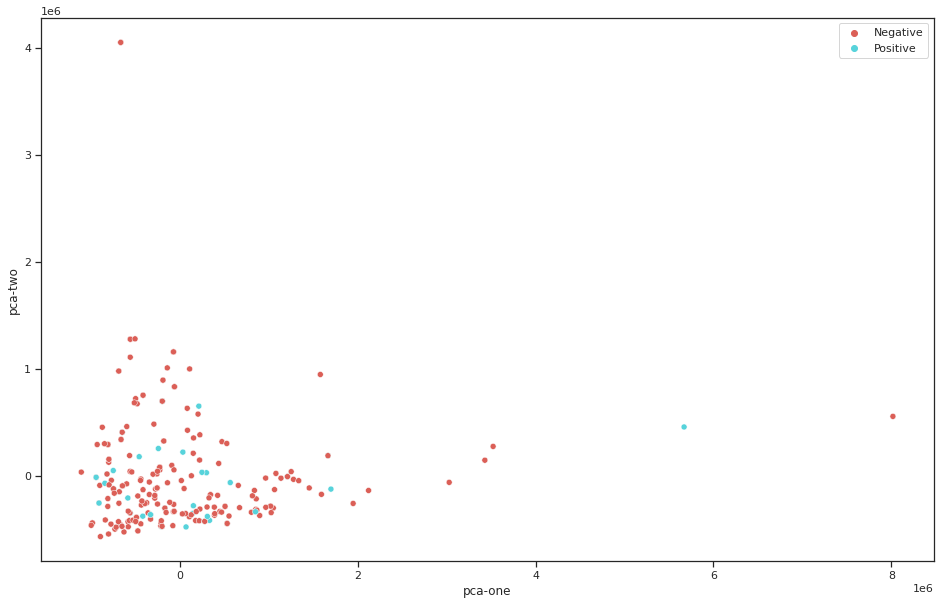

In [41]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="pca-one",
    y="pca-two",
    hue=pos_neg,
    palette=sns.color_palette("hls", 2),
    data=X.loc[rndperm, :],
    legend="full",
    alpha=1.0,
)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 241 samples in 0.010s...
[t-SNE] Computed neighbors for 241 samples in 1.308s...
[t-SNE] Computed conditional probabilities for sample 241 / 241
[t-SNE] Mean sigma: 519281.754796
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.397537
[t-SNE] KL divergence after 300 iterations: 0.531139
t-SNE done! Time elapsed: 2.351519823074341 seconds


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


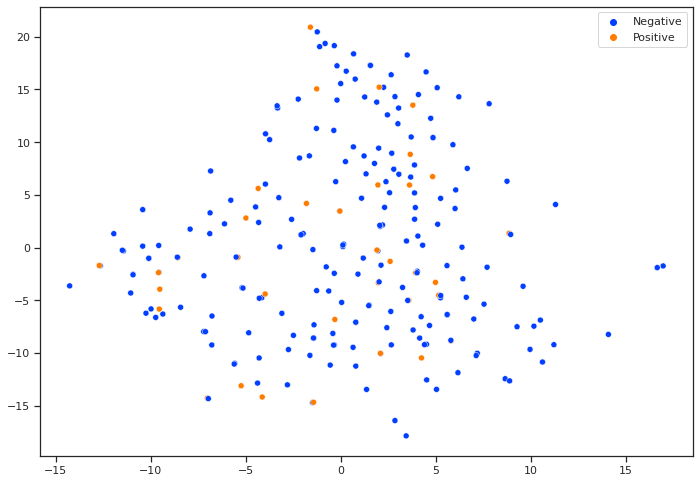

In [43]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print("t-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

sns.set_context("paper")
sns.set(rc={"figure.figsize": (11.7, 8.27)})
palette = sns.color_palette("bright", 2)
sns.set_style("ticks")


sns_plt = sns.scatterplot(
    tsne_results[:, 0],
    tsne_results[:, 1],
    hue=pos_neg,
    legend="full",
    palette=palette,
    alpha=1.0,
)

figure = sns_plt.get_figure()
figure.savefig("TSNE_BLCA.pdf", dpi=400)

In [64]:
# collect feature seelction data for positive and negative data for one class
# pre and post feature selection

# read in the training and testing data
# Lung
X_1 = pd.read_csv('/home/jovyan/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Lung_feature_selected_train.csv')
X_2 = pd.read_csv('/home/jovyan/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Lung_feature_selected_test.csv')

frames = [X_1,X_2]

X = pd.concat(frames)

y = np.array(X.pop('Lung'))



# label the column as either real or synthetic data





# show scatter plot with real and synthetic data labled

# show scatter plot with positive and negative class data labeled

# show scatter plots pre- and post feature selection



In [65]:
print("We have {} instances of data with {} variables".format(*X.shape))

# dataframe.size
size = X.size

# dataframe.shape
shape = X.shape

# dataframe.ndim
df_ndim = X.ndim

We have 286 instances of data with 1000 variables


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 286 samples in 0.000s...
[t-SNE] Computed neighbors for 286 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 286 / 286
[t-SNE] Mean sigma: 39916.235494
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.513935
[t-SNE] KL divergence after 300 iterations: 0.555145
t-SNE done! Time elapsed: 3.0288782119750977 seconds


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


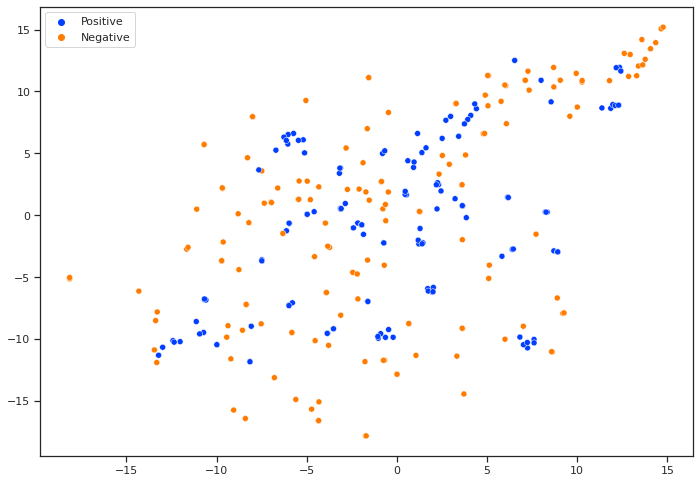

In [66]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print("t-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

sns.set_context("paper")
sns.set(rc={"figure.figsize": (11.7, 8.27)})
palette = sns.color_palette("bright", 2)
sns.set_style("ticks")


sns_plt = sns.scatterplot(
    tsne_results[:, 0],
    tsne_results[:, 1],
    hue=y,
    legend="full",
    palette=palette,
    alpha=1.0,
)

figure = sns_plt.get_figure()
figure.savefig("TSNE_BLCA_unbalanced.pdf", dpi=400)

In [55]:
# Oversample with SMOTE and random undersample for imbalanced dataset

# check version number
import imblearn
print(imblearn.__version__)
# check version number
import imblearn
print(imblearn.__version__)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# put all together to smote sample

X = pd.read_csv(
    "/home/jovyan/storage/PanCancerAnalysis/ML_2019/Metastatic_loci_consolidated/TCGA-BLCA_metastatic_data_RNAseq.csv"
)

def label_sample (row):
   if row['labels'] == "Bladder":
      return 'Negative'
   if row['labels'] == "Bone":
      return 'Negative'
   if row['labels'] == "Prostate":
      return 'Negative'
   if row['labels'] == "Lymph Node":
      return 'Negative'
   if row['labels'] == "Liver":
      return 'Negative'
   if row['labels'] == "Lung":
      return 'Positive'
   if row['labels'] == "Pelvis":
      return 'Negative'
   return 'Other'

X['pos_neg'] = X.apply (lambda row: label_sample(row), axis=1)

# Look at the shape of the data to construct the input layer.
print("We have {} instances of data with {} variables".format(*X.shape))


organs = np.array(X.pop("labels"))
y = np.array(X.pop("pos_neg"))
samples = np.array(X.pop("barcode"))

#summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)


0.7.0
0.7.0
We have 241 instances of data with 60487 variables
Counter({'Negative': 206, 'Positive': 35})
Counter({'Negative': 206, 'Positive': 206})


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


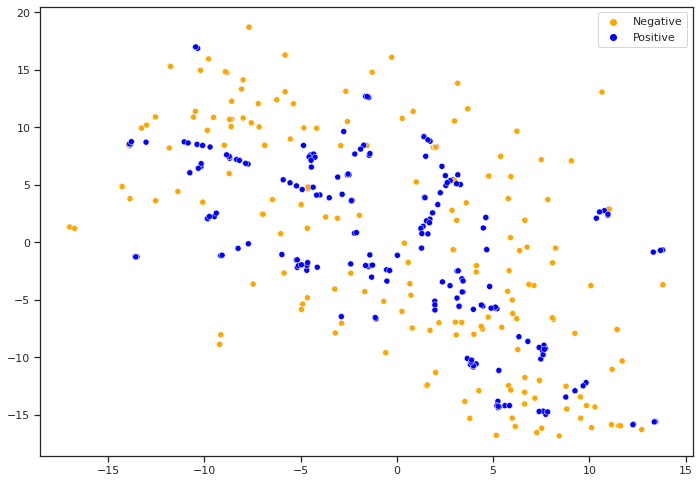

In [62]:
#time_start = time.time()
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
#tsne_results = tsne.fit_transform(X)
#print("t-SNE done! Time elapsed: {} seconds".format(time.time() - time_start))

sns.set_context("paper")
sns.set(rc={"figure.figsize": (11.7, 8.27)})
#palette = sns.color_palette("bright", 2)
sns.set_style("ticks")
palettte =["Black","Orange"]

sns_plt = sns.scatterplot(
    tsne_results[:, 0],
    tsne_results[:, 1],
    hue=y,
    legend="full",
    palette=["Orange","Blue"],
    alpha=1.0,
)
figure = sns_plt.get_figure()
figure.savefig("TSNE_BLCA_Lung.pdf", dpi=400)